In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(img, bgr=False):
    b, g, r = cv2.split(img) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

In [43]:
image = cv2.imread('YArkaya-klumba-Bright-flower-bed-6000x4000-700x466.jpg')

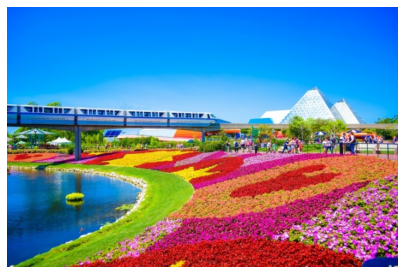

In [44]:
draw_picture(image)

In [45]:
b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
new_image = cv2.merge([r, g, b])

In [46]:
img=new_image.reshape((-1,3))

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

In [8]:
image_data = kmeans.fit(img)

In [9]:
labels=kmeans.labels_
print(labels)


[1 1 1 ... 0 0 0]


In [10]:
#Determining Centroids of Clusters
centroid=kmeans.cluster_centers_

In [11]:
NCLUSTERS = 2
NROUNDS = 1
    
height, width, channels = new_image.shape
samples = np.zeros([height*width, 3], dtype = np.float32)
count = 0
    
for x in range(height):
    for y in range(width):
        samples[count] = new_image[x][y] #BGR color
        count += 1
            
compactness, labels, centers = cv2.kmeans(samples,
                                        NCLUSTERS, 
                                        None,
                                        (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
                                        NROUNDS, 
                                        cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
res = centers[labels.flatten()]
image2 = res.reshape((new_image.shape))


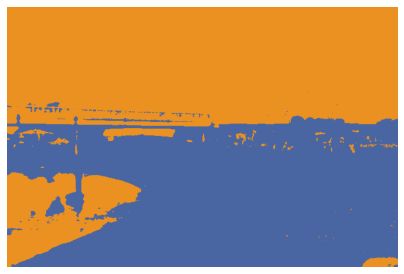

In [12]:
draw_picture(image2)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
ssim_2cl = ssim(new_image, image2, data_range=image2.max() - image2.min(),multichannel=True)

In [14]:
ssim_2cl

0.3409056871482439

In [15]:
def cluster5(new_image):
    NCLUSTERS = 5
    
    height, width, channels = new_image.shape
    samples = np.zeros([height*width, 3], dtype = np.float32)
    count = 0
    
    for x in range(height):
        for y in range(width):
            samples[count] = new_image[x][y] #BGR color
            count += 1
            
    compactness, labels, centers = cv2.kmeans(samples,
                                        NCLUSTERS, 
                                        None,
                                        (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
                                        NROUNDS, 
                                        cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    image3 = res.reshape((new_image.shape))
    return image3

In [16]:
ssim_5cl = ssim(new_image, cluster5(new_image), data_range= cluster5(new_image).max() -  cluster5(new_image).min(),multichannel=True)


In [17]:
ssim_5cl

0.5022825839598685

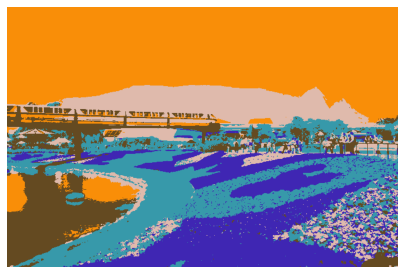

In [18]:
draw_picture(cluster5(new_image))

In [19]:
def cluster10(new_image):
    NCLUSTERS = 10
    
    height, width, channels = new_image.shape
    samples = np.zeros([height*width, 3], dtype = np.float32)
    count = 0
    
    for x in range(height):
        for y in range(width):
            samples[count] = new_image[x][y] #BGR color
            count += 1
            
    compactness, labels, centers = cv2.kmeans(samples,
                                        NCLUSTERS, 
                                        None,
                                        (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
                                        NROUNDS, 
                                        cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    image4 = res.reshape((new_image.shape))
    return image4

In [20]:
ssim_10cl = ssim(new_image, cluster10(new_image), data_range=cluster10(new_image).max() - cluster10(new_image).min(),multichannel=True)
ssim_10cl

0.6799994094274339

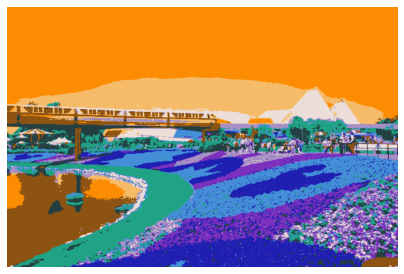

In [21]:
draw_picture(cluster10(new_image))

In [22]:
def cluster20(new_image):
    NCLUSTERS = 20
    
    height, width, channels = new_image.shape
    samples = np.zeros([height*width, 3], dtype = np.float32)
    count = 0
    
    for x in range(height):
        for y in range(width):
            samples[count] = new_image[x][y] #BGR color
            count += 1
            
    compactness, labels, centers = cv2.kmeans(samples,
                                        NCLUSTERS, 
                                        None,
                                        (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
                                        NROUNDS, 
                                        cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    image5 = res.reshape((new_image.shape))
    return image5

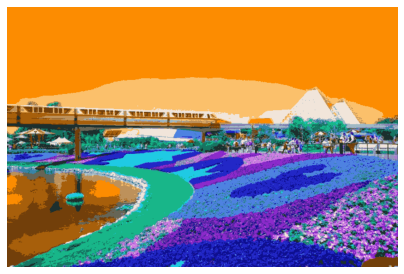

In [23]:
draw_picture(cluster20(new_image))

In [24]:
ssim_20cl = ssim(new_image, cluster20(new_image), data_range=cluster20(new_image).max() - cluster20(new_image).min(),multichannel=True)
ssim_20cl

0.7836559823590267

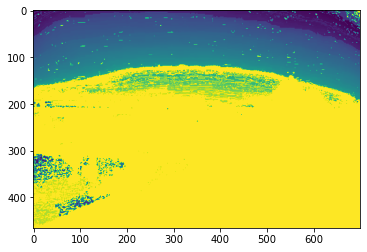

In [110]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=100).fit(img[:,:2])
plt.imshow(np.uint8(db.labels_.reshape(new_image.shape[:2])))
plt.show()

In [125]:
image_dbscan = np.uint8(db.labels_.reshape(new_image.shape[:2]))

In [201]:
ssim_dbscan = ssim(new_image[:, :, 0], image_dbscan, data_range=image_dbscan.max() - image_dbscan.min(),multichannel=True)
ssim_dbscan

0.09323201866181202

In [134]:
image_low = cv2.resize(new_image, (128, 128))
image_low_1 = image_low.reshape((-1,3))

In [169]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2)
AG_2 = clustering.fit(image_low_1)

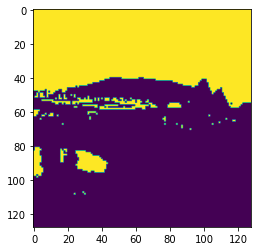

In [170]:
plt.imshow(np.uint8((AG_2.labels_.reshape(128,128,-1))))

In [171]:
AG_2_img = AG.labels_.reshape(128,128,-1)

In [199]:
ssim_AG2 = ssim(image_low[:, :, 0], AG_2_img[:, :, 0], data_range=AG_2_img[:, :, 0].max() - AG_2_img[:, :, 0].min(),multichannel=True)
ssim_AG2

0.00018115325187076115

In [203]:
clustering_5 = AgglomerativeClustering(n_clusters=5)
AG_5 = clustering_5.fit(image_low_1)
AG_5_img = AG_5.labels_.reshape(128,128,-1)

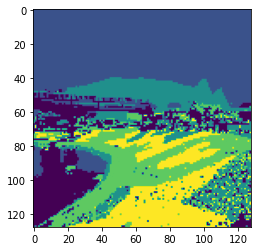

In [177]:
plt.imshow(np.uint8((AG_5.labels_.reshape(128,128,-1))))

In [204]:
ssim_AG5 = ssim(image_low[:, :, 0], AG_5_img[:, :, 0], data_range=AG_5_img[:, :, 0].max() - AG_5_img[:, :, 0].min(),multichannel=True)
ssim_AG5

0.005900633837124104

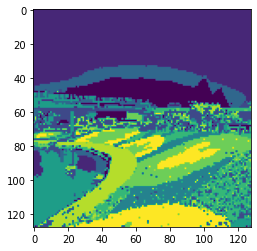

In [205]:
clustering_10 = AgglomerativeClustering(n_clusters=10)
AG_10 = clustering_10.fit(image_low_1)
plt.imshow(np.uint8((AG_10.labels_.reshape(128,128,-1))))
AG_10_img = AG_10.labels_.reshape(128,128,-1)

In [206]:
ssim_AG10 = ssim(image_low[:, :, 0], AG_10_img[:, :, 0], data_range=AG_10_img[:, :, 0].max() - AG_10_img[:, :, 0].min(),multichannel=True)
ssim_AG10

0.02705657499545569

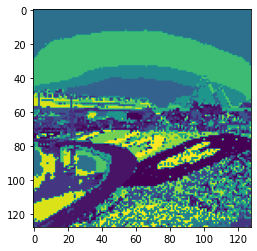

In [207]:
clustering_20 = AgglomerativeClustering(n_clusters=20)
AG_20 = clustering_20.fit(image_low_1)
plt.imshow(np.uint8((AG_20.labels_.reshape(128,128,-1))))
AG_20_img = AG_20.labels_.reshape(128,128,-1)

In [208]:
ssim_AG20 = ssim(image_low[:, :, 0], AG_20_img[:, :, 0], data_range=AG_20_img[:, :, 0].max() - AG_20_img[:, :, 0].min(),multichannel=True)
ssim_AG20

0.001971256391048732

### Выводы

K-means 20 показала наилучний результат